In [31]:
import pandas as pd
import numpy as np
import turicreate as tc
import psycopg2
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

random_seed = 1337

In [2]:
engine = create_engine('postgresql://ashok@localhost:5432/ashok')
gamesinfo = pd.read_sql_query("select * from getboard.gamesinfo;", engine) 
userinfo = pd.read_sql_query("select * from getboard.userinfo;", engine) 
gamecategories = pd.read_sql_query("select * from getboard.gamecategories;", engine) 

data = userinfo\
    .filter(["username", "gameid", "userrating"])\
    .query("userrating == userrating")

sf = tc.SFrame(data)

train, test = tc.recommender.util.random_split_by_user(sf, 
                    user_id="username",
                    item_id="gameid",
                    random_seed=random_seed,
                    item_test_proportion=0.3)

In [3]:
m1 = tc.item_similarity_recommender.create(train, 
                    user_id="username",
                    item_id="gameid")

m2 = tc.item_similarity_recommender.create(train, 
                    user_id="username",
                    item_id="gameid",
                    target="userrating")

m3 = tc.ranking_factorization_recommender.create(train, 
                    user_id="username",
                    item_id="gameid",
                    target="userrating")

m4 = tc.factorization_recommender.create(train, 
                    user_id="username",
                    item_id="gameid",
                    target="userrating")

comparison = tc.recommender.util.compare_models(test, 
            [m1, m2, m3, m4], 
            model_names=["m1", "m2", "m3", "m4"])

for i, model in enumerate((m1, m2, m3, m4)):
    for df in (train, test):
        result = model.evaluate_rmse(df, target="userrating")
        print(f"Model = {i+1}: {result.get('rmse_overall'):0.2f}")

Warning: Column 'userrating' ignored.

To use one of these as a rating column, specify the column name to be used as target userrating" and use a method that allows the use of a target.

Preparing data set.

Data has 2910874 observations with 25857 users and 40068 items.

Data prepared in: 2.17347s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 12.89ms                        | 3.75       |

| 118.52ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 5.35s                               | 0                | 16              |

| 8.37s                               | 23.5             | 9489            |

| 11.37s                              | 48.75            | 19535           |

| 14.38s                              | 71.75            | 28839           |

| 17.39s                              | 99.25            | 39848           |

| 37.56s                              | 100              | 40068           |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 38.8507s

Preparing data set.

Data has 2910874 observations with 25857 users and 40068 items.

Data prepared in: 2.31827s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 8.012ms                        | 3.75       |

| 152.444ms                      | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 3.84s                               | 0                | 0               |

| 6.85s                               | 32.75            | 13207           |

| 9.86s                               | 66               | 26477           |

| 12.86s                              | 94.25            | 37765           |

| 35.00s                              | 100              | 40068           |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 35.2884s

Preparing data set.

Data has 2910874 observations with 25857 users and 40068 items.

Data prepared in: 2.44244s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 363859 / 2910874 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | Not Viable                               |

| 5       | 0.0244141         | 2.99439                                  |

| 6       | 0.012207          | 3.22403                                  |

| 7       | 0.00610352        | 3.51211                                  |

| 8       | 0.00305176        | 3.82453                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 2.99439                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 114us        | 5.22556           | 1.63258               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.84s        | 3.09938           | 1.4056                | 0.0244141   |

| 2       | 3.63s        | 2.58204           | 1.34622               | 0.0145167   |

| 3       | 5.41s        | 2.37376           | 1.29259               | 0.0107102   |

| 4       | 7.20s        | 2.24096           | 1.25709               | 0.00863167  |

| 5       | 8.95s        | 2.14082           | 1.22629               | 0.00730151  |

| 10      | 17.77s       | 1.83681           | 1.12153               | 0.0043415   |

| 15      | 26.39s       | 1.71312           | 1.07788               | 0.00320311  |

| 20      | 34.87s       | 1.64567           | 1.05334               | 0.00258147  |

| 25      | 43.31s       | 1.60226           | 1.03749               | 0.00218366  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 1.55501

Final training RMSE: 1.0118

Preparing data set.

Data has 2910874 observations with 25857 users and 40068 items.

Data prepared in: 2.23506s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 1e-08    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-10    |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 363859 / 2910874 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | 0.74517                                  |

| 5       | 0.0488281         | 1.44534                                  |

| 6       | 0.0244141         | 1.50818                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0976562         | 0.74517                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 110us        | 2.66531           | 1.63258               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 387.296ms    | 2.76838           | 1.66339               | 0.0976562   |

| 2       | 734.389ms    | 1.97876           | 1.40636               | 0.0580668   |

| 3       | 1.06s        | 1.72456           | 1.31293               | 0.042841    |

| 4       | 1.40s        | 1.54578           | 1.24298               | 0.0290334   |

| 5       | 1.75s        | 1.46321           | 1.20929               | 0.0245592   |

| 10      | 3.44s        | 1.30504           | 1.14194               | 0.014603    |

| 20      | 6.76s        | 1.21845           | 1.10327               | 0.008683    |

| 30      | 10.12s       | 1.18543           | 1.08815               | 0.00640622  |

| 40      | 13.43s       | 1.1677            | 1.07992               | 0.00516295  |

| 50      | 16.75s       | 1.15575           | 1.07434               | 0.00436732  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 1.11801

Final training RMSE: 1.05663

PROGRESS: Evaluate model m1



Precision and recall summary statistics by cutoff
+--------+---------------------+----------------------+
| cutoff |    mean_precision   |     mean_recall      |
+--------+---------------------+----------------------+
|   1    |  0.3043478260869566 | 0.015954025127503234 |
|   2    |  0.282608695652174  | 0.028156267963538217 |
|   3    |   0.26268115942029  | 0.03764562569779984  |
|   4    | 0.25163043478260866 | 0.04794100497700939  |
|   5    | 0.24304347826086956 | 0.055912353463705614 |
|   6    |  0.2327898550724637 | 0.06213449141573166  |
|   7    |  0.2271739130434782 | 0.06985996451901093  |
|   8    | 0.22160326086956525 | 0.07648333777614118  |
|   9    | 0.21461352657004829 | 0.08126440246913742  |
|   10   | 0.21043478260869575 | 0.08631825655015637  |
+--------+---------------------+----------------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model m2

Precision and recall summary statistics by cutoff
+--------+---------------------+----------------------+
| cutof

In [28]:
for i, model in enumerate((m1, m2, m3, m4)):
    for df in (train, test):
        result = model.evaluate_rmse(df, target="userrating")
        print(f"Model = {i+1}: {result.get('rmse_overall'):0.4f}")

Model = 1: 6.9572
Model = 1: 6.9527
Model = 2: 6.9570
Model = 2: 6.9526
Model = 3: 1.0118
Model = 3: 1.3973
Model = 4: 1.0566
Model = 4: 1.2702


In [30]:
rmse_scores = pd.DataFrame({
    "model": ["Item-similarity", "Ranking-factorization", "Factorization"],
    "train_rmse": [6.9570, 1.0118, 1.0566],
    "test_rmse": [6.9526, 1.3973, 1.2702]
})

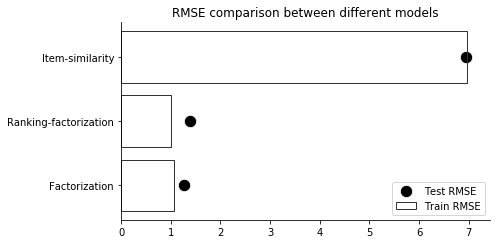

In [70]:
f, ax = plt.subplots(1,1, figsize=(7,3.5))
sns.barplot(x="train_rmse", y="model", 
            data=rmse_scores,
           facecolor=(1, 1, 1, 0),
           errcolor=".2", edgecolor=".2",
           label="Train RMSE")

sns.scatterplot(x="test_rmse", y="model", 
                data=rmse_scores, 
                label="Test RMSE",
                s=150,
                color="k"
               )

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylabel("")
ax.set_xlabel("")

ax.set_title("RMSE comparison between different models")

plt.legend()

plt.tight_layout()
plt.savefig("model-comparison.png", dpi=300)

In [17]:
user1 = tc.SFrame({
    "username": ["user1", "user1", "user1", "user1", "user1", "user1"],
    "gameid": [13, 12, 11, 5, 289843, 196045],
    "userrating": [1, 1, 1, 10, 1, 10]
})

In [18]:
m2.recommend(["user1"], new_observation_data=user1)

username,gameid,score,rank
user1,3076,0.27620455622673035,1
user1,2651,0.27119603753089905,2
user1,822,0.2608908812204997,3
user1,31260,0.25276397665341693,4
user1,478,0.2522668143113454,5
user1,9209,0.2516801655292511,6
user1,36218,0.250946581363678,7
user1,50,0.24900862574577332,8
user1,42,0.2453545331954956,9
user1,28143,0.24193242192268372,10


In [26]:
m2.recommend_from_interactions([13, 12, 3076, 50])

gameid,score,rank
2651,0.45199497044086456,1
822,0.44353146851062775,2
9209,0.4291287064552307,3
36218,0.4286653399467468,4
31260,0.4253051429986954,5
28143,0.4005175232887268,6
68448,0.39978381991386414,7
11,0.3932478576898575,8
478,0.3919884115457535,9
40692,0.37535788118839264,10


In [10]:
m4.recommend(["user1"])

username,gameid,score,rank
user1,289843,10.707108049000423,1
user1,18096,10.206528930271785,2
user1,228035,10.140095262135189,3
user1,288080,10.124920396412532,4
user1,277615,10.029549388493221,5
user1,65624,10.007928399647396,6
user1,246900,9.974592952335994,7
user1,91682,9.948351173008602,8
user1,244525,9.915015487278621,9
user1,182355,9.882518319691341,10
